In [1]:
!pip install qiskit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 23.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 23.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.4/39.4 MB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.5/107.5 kB 3.8 MB/s eta 0:00:00


In [2]:
!pip install qiskit_aer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 21.8 MB/s eta 0:00:00


# Teletrasporto Quantistico

Il teletrasporto quantistico è una tecnica che consente di trasferire un qubit di informazione senza alterare o misurare direttamente lo stato. Questa tecnologia è cruciale nel contesto dell'informatica quantistica, poiché permette di spostare informazioni quantistiche in modo sicuro ed efficiente, preservando la coerenza dello stato originale.

Nel mondo classico, la copia esatta di uno stato non è complicata, ma, nella meccanica quantistica, la situazione è diversa a causa dell'impossibilità di duplicare perfettamente uno stato quantistico sconosciuto (teorema di no-cloning).

Il teletrasporto quantistico aggira questo limite, utilizzando l'entanglement quantistico e la comunicazione classica per ricostruire esattamente lo stato di un qubit in una posizione differente.

Il programma presentato in questo progetto è scritto in Python utilizzando la libreria Qiskit. Simula il processo di teletrasporto quantistico sfruttando una coppia di qubit entangled, permettendo di trasferire lo stato quantistico di un qubit iniziale (qubit in possesso di Alice) a un altro qubit delocalizzato (qubit Bob).
In questa simulazione, verranno esplorati i concetti chiave del teletrasporto quantistico, inclusa la preparazione dello stato, la creazione di coppie entangled, la misurazione e la correzione degli stati quantistici.



### Librerie utilizzate nel progetto

In [3]:
from qiskit import QuantumCircuit
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram
from qiskit import transpile, assemble
from numpy import sqrt
import math
from qiskit.quantum_info import state_fidelity, Statevector, partial_trace

Il codice Python importa le seguenti librerie essenziali:

*   QuantumCircuit per la creazione e manipolazione dei circuiti quantistici
*   Aer per la simulazione dei circuiti quantistici
*   execute e plot_histogram per l'esecuzione delle simulazioni e la visualizzazione dei risultati

### Inizializzazione del Circuito Quantistico
Il circuito è progettato per operare su tre qubit e tre bit classici:
*   Qubit 0: rappresenta lo stato quantistico che Alice vuole teletrasportare
*   Qubit 1: è uno dei qubit entangled che sarà misurato da Alice
*   Qubit 2: è l’altro qubit entangled che Bob utilizzerà per ricostruire lo stato quantistico originale di Alice

Il circuito inizia con tre qubit inizializzati nello stato $∣0\rangle$ e tre bit classici inizializzati a 0.

In [4]:
qc = QuantumCircuit(3, 3)

### Creazione dell'entanglement tra qubit
Il primo passo per il teletrasporto è creare un’entanglement tra Qubit 1 e Qubit 2. Questo viene realizzato attraverso l'applicazione di una porta Hadamard $H$ sul Qubit 1, seguita da una porta CNOT con Qubit 1 come controllo e Qubit 2 come target. Il risultato è un sistema entangled descritto dallo stato di Bell:


$|\text{q}_1\text{q}_2\rangle = |\beta_{00}\rangle = \frac{1}{\sqrt{2}}(|00\rangle + |11\rangle )$


In [5]:
# Applica la porta Hadamard al qubit 1
qc.h(1)

# Applica la porta CNOT con il qubit 1 come controllo e il qubit 2 come target
qc.cx(1, 2)

### Preparazione dello Stato del Qubit da Teletrasportare
Alice desidera teletrasportare uno stato quantistico arbitrario $|\psi\rangle$. Questo stato può essere generalmente rappresentato come una combinazione lineare degli stati base $|0\rangle$ e $|1\rangle$:
$|q_0\rangle = |\psi\rangle = \alpha|0\rangle + \beta|1\rangle$ \
con i coefficienti complessi $\alpha$ e $\beta$ che soddisfano la condizione di normalizzazione $|α|^2+|\beta|^2=1$.

Nel caso in esame, i valori scelti per $\alpha$ e $\beta$ sono tali che $\alpha^2 = 0.9$ e $\beta^2 = 0.1$. Esplicitamente, possiamo scrivere:
$|\psi\rangle=\sqrt{0.9}|0\rangle + \sqrt{0.1}|1\rangle$ \

Per visualizzare e manipolare lo stato $|\psi\rangle$, è utile esprimere $\alpha$ e $\beta$ in termini di angoli $\theta$ e $\phi$, utilizzando le funzioni seno e coseno (si osserva che seno e coseno soddisfano naturalmente la condizione di normalizzazione):
$|\psi\rangle =  \cos\left(\frac{\theta}{2}\right)|0\rangle + \sin\left(\frac{\theta}{2}\right)e^{i\phi}|1\rangle$

In questa rappresentazione $\theta$ è l'angolo polare (determina la distribuzione tra i due stati base) mentre $\phi$ è l'angolo azimutale che rappresenta la fase relativa tra le due componenti.

Nel caso in cui $\alpha = \sqrt{0.9}$ e $\beta = \sqrt{0.1}$ , l'angolo
$\theta$ è determinato da $cos(\frac{\theta}{2}) = \sqrt{0.9}$ e $sin(\frac{\theta}{2}) = \sqrt{0.1}$
Per $\phi$ possiamo scegliere un valore arbitrario poiché $\beta$ è reale e positivo: ad esempio, possiamo fissare $\phi=0$.

Lo stato quantistico $|\psi\rangle$ può essere rappresentato sulla sfera di Bloch, una rappresentazione geometrica tridimensionale degli stati quantistici puri. Ogni stato del qubit corrisponde a un punto sulla superficie della sfera unitaria. Le coordinate cartesiane $(x,y,z)$ del punto sulla sfera di Bloch sono ottenute calcolando le medie degli operatori di Pauli $X,Y,Z$ sullo stato $|\psi\rangle$:

$x= ⟨\psi|X|\psi\rangle= cos\phi sin\theta $

$y= ⟨\psi|Y|\psi\rangle= sin\phi sin\theta$

$z= ⟨\psi|Z|\psi\rangle= cos\theta$


Saving sfera.png to sfera.png


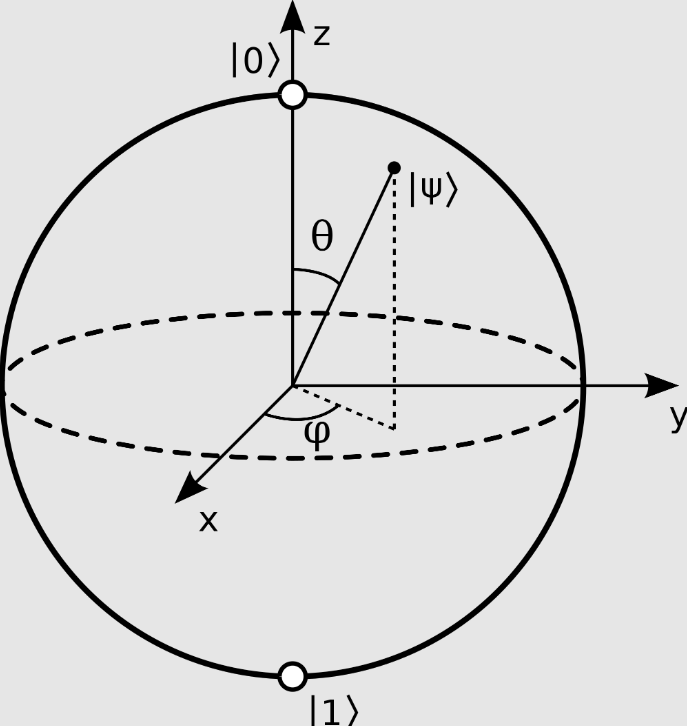

In [6]:
from google.colab import files

# Carica l'immagine dal PC
uploaded = files.upload()
from IPython.display import display, HTML

# Nome dell'immagine caricata
image_name = "sfera.jpg"

from IPython.display import Image, display

# Visualizza l'immagine
display(Image(filename='sfera.png'))


Considerando $cos(\frac{\theta}{2}) = \sqrt{0.9}$, $sin(\frac{\theta}{2}) = \sqrt{0.1}$ e $\phi=0$, le coordinate del punto $|\psi\rangle$ sulla sfera di Bloch possono essere calcolate come segue:

$x=sin\theta = 2sin(\frac{\theta}{2})cos(\frac{\theta}{2})= 0.6$

$y= 0$

$z= cos\theta= cos^2 (\frac{\theta}{2})-sin^2 (\frac{\theta}{2})=  0.8$

Nella simulazione, il Qubit 0 viene preparato nello stato $|\psi\rangle$ utilizzando porte di rotazione che manipolano l'angolo $\theta$ e la fase $\phi$ per ottenere la configurazione desiderata. Nello specifico, essendo che $\phi=0$, è utilizzata una porta $R_y$ per effettuare una rotazione di un angolo $\theta$.

In [7]:
# Calcolo dell'angolo theta per l'operazione Ry: |psi>= sin(theta/2)e^iphi|0>+cos(theta/2)|1>
theta = 2 * math.acos(sqrt(0.9))

# Applicazione della rotazione Ry al qubit 0
qc.ry(theta, 0)

### Applicazione delle Porte Quantistiche
Per eseguire il teletrasporto, Alice applica una porta CNOT tra il Qubit 0 e il Qubit 1, seguita da una porta Hadamard sul Qubit 0. Dopo queste operazioni, il sistema complessivo (Qubit 0, 1 e 2) si trova in uno stato entangled.

In [8]:
# Applicazione della porta CNOT con il qubit 0 come controllo e il qubit 1 come target |psi0> -CNOT- |psi1>
qc.cx(0, 1)

# Applicazione della porta Hadamard al qubit 0 (ho |psi2>)
qc.h(0)

### Misurazione dei Qubit e Correzioni
Alice misura Qubit 0 e Qubit 1, registrando i risultati nei corrispondenti bit classici. Questi risultati vengono inviati a Bob attraverso un canale classico.

In [9]:
# Misura dei qubit 0 e 1 e memorizzazione dei risultati nei bit classici 0 e 1
qc.measure([0, 1], [0, 1])

### Operazioni correttive

Alice comunica a Bob i risultati delle sua misure. Bob, in base ai risultati delle misure di Alice, applica di volta in volta le correzioni necessarie sul Qubit 2:

Se entrambi i bit classici sono 0, nessuna operazione è necessaria.
Se il primo bit è 1, Bob applica una porta $Z$.
Se il secondo bit è 1, Bob applica una porta $X$.
Queste operazioni garantiscono che Qubit 2 di Bob si trovi nello stato $|\psi\rangle$

In [10]:
# Applicazione delle operazioni correttive in base ai risultati delle misure di Alice

# Caso 10: applicare la porta Z
qc.z(2).c_if(qc.clbits[0], 1)  # Se il primo bit classico (risultato di Alice) è 1, applica Z

# Caso 01: applicare la porta X
qc.x(2).c_if(qc.clbits[1], 1)  # Se il secondo bit classico (risultato di Alice) è 1, applica X

# Caso 11: applicare prima Z poi X


### Simulazione del Circuito e Analisi dei Risultati
Il circuito viene eseguito su un simulatore di stato quantistico fornito da Qiskit.

Per verificare che il teletrasporto quantistico abbia funzionato correttamente, occorre confrontare lo stato finale del qubit teletrasportato (Qubit 2) con lo stato originale $|\psi\rangle$. Una singola misura sul qubit 2 non è sufficiente per confermare che lo stato $|\psi\rangle$ è stato correttamente teletrasportato, poiché la misura stessa è probabilistica.
In simulazioni con Qiskit, è possibile calcolare direttamente la "fidelity" tra lo stato finale di Bob e lo stato originario.

La fedeltà ("fidelity") è una misura della "somiglianza" tra due stati quantistici. Se la fedeltà è 1, significa che i due stati sono identici, indicando che il processo di teletrasporto è stato eseguito con successo.

In [11]:
# Circuito eseguito usando il simulatore di vettori di stato
backend = Aer.get_backend('statevector_simulator')
t_qc = transpile(qc, backend)
result = backend.run(t_qc).result()

# Vettore di stato finale del sistema
final_state = result.get_statevector()

# Isolamento dello stato del qubit 2 (qubit di Bob) usando la traccia parziale
final_state_qubit2 = partial_trace(final_state, [0, 1])

# Definizione dello stato originale |ψ⟩ (lo stato iniziale che Alice voleva teletrasportare)
original_psi = Statevector([0.9**0.5, 0.1**0.5])

# Fedeltà tra lo stato finale di Bob e lo stato originale
fidelity = state_fidelity(final_state_qubit2, original_psi)
print(f"Fedelta' tra lo stato teletrasportato e l'originale: {fidelity}")


Fedelta' tra lo stato teletrasportato e l'originale: 0.9999999999999998


### Istogramma
L'istogramma delle misurazioni ottenute fornisce una visualizzazione immediata del processo di teletrasporto.

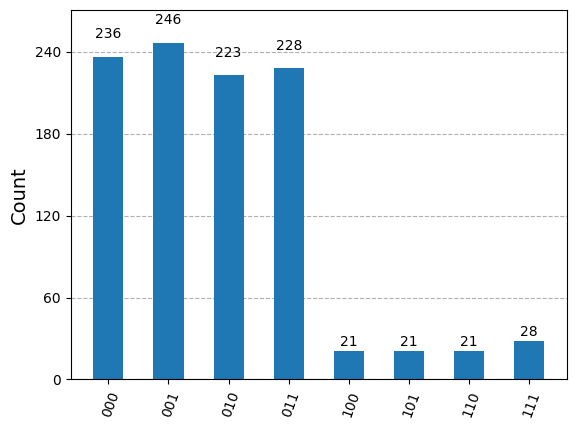

In [12]:
# Misurazione dei qubit rilevanti (Qubit 0, 1 e 2)
qc.measure([0, 1, 2], [0, 1, 2])

# Il simulatore QASM esegue le misurazioni
qasm_backend = Aer.get_backend('qasm_simulator')
t_qc = transpile(qc, qasm_backend)
qasm_result = qasm_backend.run(t_qc).result()

# Risultati delle misurazioni
counts = qasm_result.get_counts()

# Rappresentazione dell'istogramma con i risultati a 3 cifre
plot_histogram(counts)

### Analisi dei risultati

Vengono eseguite numerose misurazioni del circuito per raccogliere un numero significativo di dati statistici (1024 di default). Ogni volta che si esegue una misura, Alice ottiene uno dei quattro possibili risultati sui suoi due qubit: 00, 01, 10, o 11.
Sulla base del risultato ottenuto da Alice, Bob applica le correzioni necessarie al suo qubit per ottenere lo stato quantistico che si vuole teletrasportare. Avendo già verificato il corretto funzionamento del meccanismo di teletrasporto, è possibile, misurando lo stato del qubit di Bob, ottenere una stima dei coefficienti $\alpha$ e $\beta$.

Si vuole determinare la probabilità che la misura di Bob dia come risultato 0 o 1. La probabilità per ciascuno dei due casi ($p_0$ e $p_1$ rispettivamente) viene calcolata dividendo la somma delle loro frequenze per il numero totale di esperimenti (N).

Le stime per i parametri $\alpha$ e $\beta$ vengono poi derivate come la radice quadrata delle probabilità di ottenere 0 o 1 (rispettivamente). Questo passaggio riflette la relazione tra probabilità e ampiezze di probabilità in meccanica quantistica, dove la probabilità di uno stato quantistico è proporzionale al quadrato del modulo della sua ampiezza.

Per verificare la compatibilità di $\alpha$ e $\beta$ ottenuti dalla simulazione con i valori teorici corrispondenti, si calcolano gli errori standard $\sigma_\alpha$ e $\sigma_\beta$ come:

$\sigma_\alpha= \frac{\sigma_{p_0}}{2\sqrt{p_0}}= \frac{1}{2\sqrt{p_0}}\sqrt{\frac{p_0(1-p_0)}{N}}= \frac{\sqrt{1-p_0}}{2\sqrt{N}}$

dove l'errore standard sulla stima di $p_0$ è calcolato utilizzando la formula per l'errore standard di una binomiale.
Analogamente si ha:

$\sigma_\beta= \frac{\sqrt{1-p_1}}{2\sqrt{N}}$

Gli intervalli di compatibilità per $\alpha$ e $\beta$ sono ottenuti approssimando ad un intervallo di confidenza di 3σ secondo la regola della distribuzione normale.
Questi intervalli sono confrontati con i valori teorici attesi, permettendo una valutazione della coerenza e dell'accuratezza dei risultati ottenuti dall'esperimento.

In [13]:
total_shots = sum(counts.values())
prob_0 = counts.get('000', 0) + counts.get('001', 0) + counts.get('010', 0) + counts.get('011', 0)
prob_1 = counts.get('100', 0) + counts.get('101', 0) + counts.get('110', 0) + counts.get('111', 0)

# Calcolo delle probabilità normalizzate
p_0 = prob_0 / total_shots
p_1 = prob_1 / total_shots

# Stima dei valori di alpha e beta in base alle probabilità calcolate
print(f"Alpha stimato: {sqrt(p_0)}")
print(f"Beta stimato: {sqrt(p_1)}")

# Calcolo dell'errore statistico per alpha e beta
e_a = (sqrt(1-p_0))/(2*sqrt(1024))
e_b = (sqrt(1-p_1))/(2*sqrt(1024))

# Stampa degli errori statistici calcolati
print(f"L'errore statistico di alpha e' {e_a}")
print(f"L'errore statistico di beta e' {e_b}")

# Calcolo e stampa degli intervalli di compatibilità per alpha e beta
print(f"Intervalli di compatibilità: ")
print(f"Alpha: [{sqrt(p_0)-3*e_a},{sqrt(p_0)+3*e_a}] con alpha teorico: {sqrt(0.9)}")
print(f"Beta: [{sqrt(p_1)-3*e_b},{sqrt(p_1)+3*e_b}] con beta teorico: {sqrt(0.1)}")

Alpha stimato: 0.954532771831329
Beta stimato: 0.2981060004427955
L'errore statistico di alpha e' 0.00465790625691868
L'errore statistico di beta e' 0.014914574559864516
Intervalli di compatibilità: 
Alpha: [0.940559053060573,0.968506490602085] con alpha teorico: 0.9486832980505138
Beta: [0.25336227676320194,0.34284972412238907] con beta teorico: 0.31622776601683794



Per un'analisi più completa, vengono considerati separatamente i casi corrispondenti ai diversi valori ottenuti da Alice (000 e 100, 001 e 101, ...). Per ciascuno di questi casi è effettuata nuovamente la stima dei parametri $\alpha$ e $\beta$ ed è verificata la compatibilità degli stessi con i valori teorici.  
La funzione visualizza le stime, gli errori statistici e i range di accettabilità per $\alpha$ e $\beta$, insieme ad un confronto con i valori teorici. Se vi è compatibilità viene stampato il messaggio "Corretto", altrimenti l'utente leggerà "Fuori range".

In [14]:
# Funzione per stima di Alpha e Beta per ogni stato, con stimatori e intervalli di accettabilità
def stima_alpha_beta(counts, stato_0, stato_1, alpha_teorico=None, beta_teorico=None):
    print(f"Stime di Alpha e Beta per gli stati {stato_0} e {stato_1}:")
    print()
    # Calcolo del numero totale di misure
    tot_shots = counts.get(stato_0, 0) + counts.get(stato_1, 0)
    if tot_shots == 0:
        print(f"Errore: Non ci sono conteggi per gli stati {stato_0} e {stato_1}.")
        return

    # Calcolo delle probabilità
    prob_0 = counts.get(stato_0, 0) / tot_shots
    prob_1 = counts.get(stato_1, 0) / tot_shots

    # Stima di alpha e beta per i singoli stati
    stima_alpha = sqrt(prob_0)
    stima_beta = sqrt(prob_1)

    # Calcolo degli errori
    errore_alpha = (sqrt(1 - prob_0)) / (2 * sqrt(tot_shots))
    errore_beta = (sqrt(1 - prob_1)) / (2 * sqrt(tot_shots))

    # Calcolo dei range di accettabilità
    range_alpha_inferiore = stima_alpha - 3 * errore_alpha
    range_alpha_superiore = stima_alpha + 3 * errore_alpha
    range_beta_inferiore = stima_beta - 3 * errore_beta
    range_beta_superiore = stima_beta + 3 * errore_beta

    # Output della stima di Alpha
    print(f"Stima di Alpha {stato_0}: {stima_alpha:.5f}")
    print(f"Errore statistico di Alpha: {errore_alpha:.5f}")
    print(f"Range di accettabilità per Alpha ({stato_0}): [{range_alpha_inferiore:.5f}, {range_alpha_superiore:.5f}]")
    # Confronto con i valori teorici
    if alpha_teorico is not None:
        in_range_alpha = range_alpha_inferiore <= alpha_teorico <= range_alpha_superiore
        print(f"Valore teorico di Alpha: {alpha_teorico:.5f}")
        print(f"Verifica di Alpha: {'Corretto' if in_range_alpha else 'Fuori range'}")

    # Output della stima di Beta
    print(f"\nStima di Beta {stato_1}: {stima_beta:.5f}")
    print(f"Errore statistico di Beta: {errore_beta:.5f}")
    print(f"Range di accettabilità per Beta ({stato_1}): [{range_beta_inferiore:.5f}, {range_beta_superiore:.5f}]")
    # Confronto con i valori teorici
    if beta_teorico is not None:
        in_range_beta = range_beta_inferiore <= beta_teorico <= range_beta_superiore
        print(f"Valore teorico di Beta: {beta_teorico:.5f}")
        print(f"Verifica di Beta: {'Corretto' if in_range_beta else 'Fuori range'}")
    print(f"****************************************************************")
    print()

# Risultati delle misurazioni
counts = qasm_result.get_counts()

# Valori teorici (se conosciuti)
alpha_teorico = sqrt(0.9)
beta_teorico = sqrt(0.1)

# Stima per vari stati
stima_alpha_beta(counts, '000', '100', alpha_teorico, beta_teorico)
stima_alpha_beta(counts, '001', '101', alpha_teorico, beta_teorico)
stima_alpha_beta(counts, '010', '110', alpha_teorico, beta_teorico)
stima_alpha_beta(counts, '011', '111', alpha_teorico, beta_teorico)

Stime di Alpha e Beta per gli stati 000 e 100:

Stima di Alpha 000: 0.95827
Errore statistico di Alpha: 0.00892
Range di accettabilità per Alpha (000): [0.93153, 0.98502]
Valore teorico di Alpha: 0.94868
Verifica di Alpha: Corretto

Stima di Beta 100: 0.28585
Errore statistico di Beta: 0.02989
Range di accettabilità per Beta (100): [0.19619, 0.37552]
Valore teorico di Beta: 0.31623
Verifica di Beta: Corretto
****************************************************************

Stime di Alpha e Beta per gli stati 001 e 101:

Stima di Alpha 001: 0.95987
Errore statistico di Alpha: 0.00858
Range di accettabilità per Alpha (001): [0.93412, 0.98561]
Valore teorico di Alpha: 0.94868
Verifica di Alpha: Corretto

Stima di Beta 101: 0.28045
Errore statistico di Beta: 0.02937
Range di accettabilità per Beta (101): [0.19233, 0.36856]
Valore teorico di Beta: 0.31623
Verifica di Beta: Corretto
****************************************************************

Stime di Alpha e Beta per gli stati 010 e 11

### Conclusioni


Attraverso l'analisi statistica e il confronto dei risultati ottenuti con le previsioni teoriche, è possibile valutare l'efficacia del protocollo di teletrasporto quantistico implementato.

Il teletrasporto quantistico è una tecnica potente che consente di trasferire informazioni quantistiche senza la necessità di trasmettere fisicamente il qubit. Il concetto di entanglement è fondamentale per questo processo, poiché permette a due qubit di condividere un legame quantistico che può essere utilizzato per il trasferimento sicuro delle informazioni. Questo meccanismo ha potenziali implicazioni di grande rilievo per la crittografia quantistica.

Sebbene il programma simulato rappresenti un caso ideale, è importante riconoscere le sfide pratiche nell'implementazione del teletrasporto quantistico su hardware reale. Fattori come l'instabilità dei sistemi quantistici (ad esempio, bit flip ed errori di fase) e eventuali errori di misurazione devono essere attentamente gestiti per garantire il corretto funzionamento del protocollo. Tuttavia, le simulazioni condotte con strumenti come Qiskit forniscono un prezioso punto di partenza per comprendere queste tecnologie emergenti, offrendo una base solida per future applicazioni pratiche nel campo della computazione e della crittografia quantistica.
